# CNN using CIFAR10 dataset

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, models, layers

import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 1919s 11us/step


In [9]:
classes = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']

In [5]:
X_train.shape

(50000, 32, 32, 3)

## Preprocessing

In [50]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [51]:
plt.style.use(['dark_background'])
def plot_images(x, y, index):
    plt.figure(figsize=(10, 2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])    

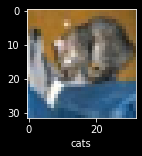

In [52]:
plot_images(X_test, y_test, 0)

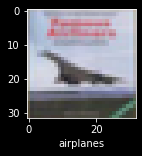

In [53]:
plot_images(X_test, y_test, 3)

## Normalize

In [62]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## ANN Model

In [69]:
ann_model = models.Sequential([
    layers.Flatten(input_shape=X_train.shape[1:]),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')    
])

In [70]:
ann_model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [71]:
ann_model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 99s 63ms/step - loss: 1.8115 - accuracy: 0.3526
Epoch 2/10
1563/1563 [==============================] - 99s 63ms/step - loss: 1.6194 - accuracy: 0.4276
Epoch 3/10
1563/1563 [==============================] - 104s 67ms/step - loss: 1.5402 - accuracy: 0.4582
Epoch 4/10
1563/1563 [==============================] - 113s 72ms/step - loss: 1.4811 - accuracy: 0.4770
Epoch 5/10
1563/1563 [==============================] - 108s 69ms/step - loss: 1.4312 - accuracy: 0.4972
Epoch 6/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.3886 - accuracy: 0.5126
Epoch 7/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.3503 - accuracy: 0.5255
Epoch 8/10
1563/1563 [==============================] - 119s 76ms/step - loss: 1.3157 - accuracy: 0.5373
Epoch 9/10
1563/1563 [==============================] - 113s 72ms/step - loss: 1.2852 - accuracy: 0.5501
Epoch 10/10
1563/1563 [==============================] - 

In [75]:
ann_yPred = ann_model.predict(X_test)

313/313 [==============================] - 6s 19ms/step


'dogs'

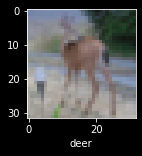

In [84]:
ind = 100
plot_images(X_test, y_test, ind)
classes[np.argmax(ann_yPred[ind])]

In [92]:
from sklearn.metrics import classification_report

ann_pred_classes = [np.argmax(i) for i in ann_yPred]
print(classification_report(y_test, ann_pred_classes))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60      1000
           1       0.60      0.73      0.66      1000
           2       0.36      0.52      0.42      1000
           3       0.33      0.37      0.35      1000
           4       0.48      0.36      0.41      1000
           5       0.35      0.54      0.42      1000
           6       0.67      0.41      0.51      1000
           7       0.60      0.56      0.58      1000
           8       0.78      0.50      0.61      1000
           9       0.64      0.48      0.55      1000

    accuracy                           0.51     10000
   macro avg       0.54      0.51      0.51     10000
weighted avg       0.54      0.51      0.51     10000



## CNN model

In [101]:
cnn_model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    
    layers.Dense(10, activation='softmax')
])

In [104]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [105]:
cnn_model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.0389 - accuracy: 0.6352
Epoch 2/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8495 - accuracy: 0.7025
Epoch 3/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7060 - accuracy: 0.7519
Epoch 4/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.5815 - accuracy: 0.7940
Epoch 5/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.4718 - accuracy: 0.8333
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.3817 - accuracy: 0.8645
Epoch 7/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.3103 - accuracy: 0.8904
Epoch 8/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.2544 - accuracy: 0.9100
Epoch 9/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.2200 - accuracy: 0.9221
Epoch 10/10
1563/1563 [==============================] - 59s 38m

In [108]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 8ms/step - loss: 1.4762 - accuracy: 0.6775


[1.4762240648269653, 0.6775000095367432]

In [106]:
cnn_yPred = cnn_model.predict(X_test)

313/313 [==============================] - 3s 9ms/step


In [107]:
cnn_pred_classes = [np.argmax(i) for i in cnn_yPred]
print(classification_report(y_test, cnn_pred_classes))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71      1000
           1       0.88      0.73      0.80      1000
           2       0.57      0.58      0.58      1000
           3       0.46      0.53      0.50      1000
           4       0.61      0.66      0.64      1000
           5       0.56      0.59      0.58      1000
           6       0.73      0.76      0.74      1000
           7       0.74      0.70      0.72      1000
           8       0.78      0.80      0.79      1000
           9       0.77      0.75      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

